In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
discussions = pd.read_csv("../data/skillshare_2022_discussions.csv", index_col=0)
discussions

,id,title,user_id,type,discussable_id,discussable_type,num_up,num_down,score,is_deleted,update_time,create_time,link_url,is_reported,reported_by_uid,is_legacy
0,303709,NaN,20112674,General,494107,ParentClasses,0,0,NaN,False,2022-01-04 02:35:43,2022-01-04 02:35:43,NaN,NaN,NaN,False
1,303710,A Vintage Wildflower Challenge Just For YOU,1574417,Announcement,1574417,Users,3,0,3.0,False,2022-01-04 02:43:49,2022-01-04 02:43:49,NaN,NaN,NaN,False
2,303713,NaN,23718648,Project,543898,ParentClasses,9,0,9.0,False,2022-01-04 02:53:30,2022-01-04 02:53:30,NaN,NaN,NaN,False
3,303716,NaN,23631847,Question,428389,ParentClasses,1,0,0.0,False,2022-01-04 03:28:16,2022-01-04 03:28:16,NaN,NaN,NaN,False
4,303717,NaN,23431967,Question,106189,ParentClasses,0,0,NaN,False,2022-01-04 03:36:00,2022-01-04 03:36:00,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,324979,NaN,25361444,Announcement,181207,ParentClasses,0,0,NaN,True,2022-06-22 14:47:48,2022-06-22 14:44:07,NaN,NaN,NaN,False
9604,324987,NaN,26148382,Question,311273,ParentClasses,0,0,NaN,False,2022-06-22 16:00:14,2022-06-22 16:00:14,NaN,NaN,NaN,False
9605,324990,NaN,11030919,Announcement,482424,ParentClasses,0,0,NaN,False,2022-06-22 16:09:02,2022-06-22 16:09:02,NaN,NaN,NaN,False
9606,324991,NaN,22674407,Announcement,22674407,Users,0,0,NaN,False,2022-06-22 16:23:33,2022-06-22 16:23:33,NaN,NaN,NaN,False


In [10]:
print(f"Posts range from {discussions.create_time.min()} to {discussions.create_time.max()}")
print(f"{len(discussions.user_id.unique())} unique users posted comments.")

Posts range from 2022-01-01 05:43:49 to 2022-06-25 18:17:01
6024 unique users posted comments.


In [5]:
# Post counts for individual users
discussions.user_id.value_counts()

23390131    64
23841710    41
23776854    38
3974009     34
24956665    33
            ..
22966597     1
20197177     1
25380775     1
22905297     1
24867201     1
Name: user_id, Length: 6024, dtype: int64

In [6]:
starts_with_views_df = pd.read_csv('../data/skillshare_2022_starts_views_combined.csv', index_col=0)
starts_with_views_df = starts_with_views_df[starts_with_views_df.user_uid.notnull()]
starts_with_views_df.user_uid = starts_with_views_df.user_uid.astype(int)
starts_with_views_df.set_index("user_uid", inplace=True)

day_columns = [ f"day-{i}" for i in range(1, 32) ]
starts_with_views_df["total_watch_time"] = starts_with_views_df[day_columns].sum(axis=1)
starts_with_views_df.head()

,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,day-2,...,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_watch_time
user_uid,,,,,,,,,,,,,,,,,,,,,
23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0
23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0
23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
starts_with_views_df["post_count"] = discussions.user_id.value_counts()
starts_with_views_df["post_count"] = starts_with_views_df["post_count"].fillna(0)
(starts_with_views_df["post_count"] != 0).sum()

3903

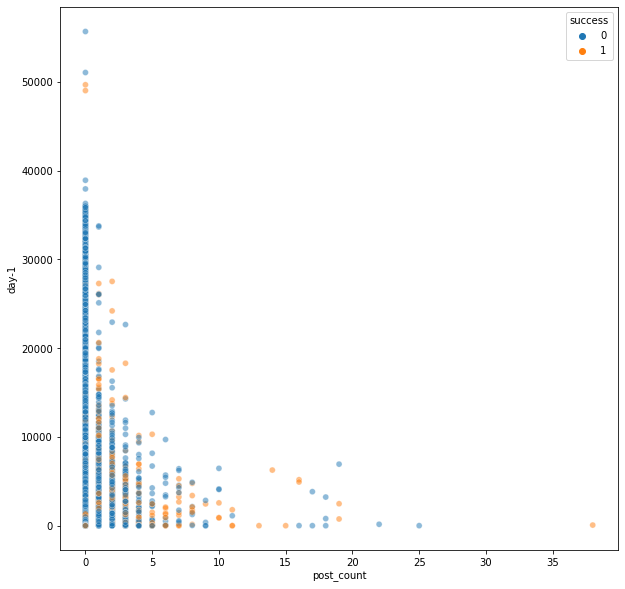

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=starts_with_views_df,
    x="post_count",
    y="day-1",
    alpha=0.5,
    hue="success")
plt.show()